**Задание 1:** Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.<br>
**Задание 2: (опция).** Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.<br>
**Задание 3:(опция).** Реализовать алгоритм градиетного бустинга, основанный на реализации решающего дерева из ДЗ4 / методички к уроку 4. Сделать выводы о качестве алгоритма по сравнению с реализацией из п.1.

------

In [1]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns

1) Реализация из методички:

In [3]:
def gb_predict(X, trees_list, coef_list, eta):
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

def bias(y, z):
    return (y - z)

def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta, fit_size):
    
    trees = []
    train_errors = []
    test_errors = []
    fit_size = int(X_train * fit_size) if fit_size < 1 else int(fit_size)
    
    for i in range(n_trees):
        mask = np.random.choice(np.arange(X_train.shape[0]), size=fit_size, replace=False)
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        np.random.choice(np.arange(2), size=2, replace=False)
        if len(trees) == 0:
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            target = gb_predict(X_train, trees, coefs, eta)
            
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append([tree, mask])
        
    return trees, train_errors, test_errors

def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [4]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [102]:
X_size = X.shape[0]
np.random.choice(np.arange(2), size=2, replace=False)

array([0, 1])

In [5]:
n_trees = 20
coefs = [1] * n_trees
max_depth = 3
eta = 0.5

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 20 деревьев глубиной 3     с шагом 0.5 на тренировочной выборке: 887.9872142264742
Ошибка алгоритма из 20 деревьев глубиной 3     с шагом 0.5 на тестовой выборке: 3310.0289002982013


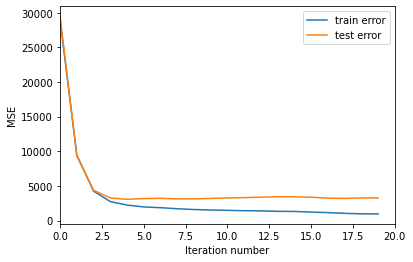

In [6]:
get_error_plot(n_trees, train_errors, test_errors)

In [7]:
coefs = [1] * n_trees
eta = 0.2

results = pd.DataFrame(columns=['n_trees', 'depth', 'train_mae', 'test_mae'])

for n_trees in range(2, 40, 5):
    for depth in range(2, 8):
        trees, train_errors, test_errors = gb_fit(n_trees, depth, X_train, X_test, y_train, y_test, coefs, eta)
        train_mae = mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta))
        test_mae = mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta))
        results = results.append({'n_trees': n_trees,
                                  'depth': depth,
                                  'train_mae': train_mae,
                                  'test_mae': test_mae},
                                 ignore_index=True)
    print(n_trees)

2
7
12
17
22
27
32
37


In [33]:
results = pd.DataFrame(columns=['n_trees', 'depth', 'train_mae', 'test_mae'])
results['n_trees'] = results['n_trees'].astype('int')
results['depth'] = results['depth'].astype('int')
# results.head()

,n_trees,depth,train_mae,test_mae


In [23]:
results_train = results.pivot('depth', 'n_trees', 'train_mae')
results_test = results.pivot('depth', 'n_trees', 'test_mae')

print('Train:')
results_train

Train:


n_trees,2,7,12,17,22,27,32,37
depth,,,,,,,,
2,13804.664651,4009.584785,2655.999735,2310.726660,2171.267282,2171.267282,2171.267282,2171.267282
3,13531.196916,3423.404935,1967.753259,1608.255565,1474.118360,1474.118360,1474.118360,1474.118360
4,13253.702259,2935.765379,1477.835960,1176.942064,1071.803450,1071.803450,1071.803450,1071.803450
5,12960.358477,2428.118856,930.017202,575.483127,476.792269,476.792269,476.792269,476.792269
6,12712.157524,2042.623967,528.977355,230.504387,165.545790,165.545790,165.545790,165.545790
7,12430.544620,1788.751114,373.627214,120.426766,69.838703,69.838703,69.838703,69.838703


In [22]:
print('Test:')
results_test

Test:


n_trees,2,7,12,17,22,27,32,37
depth,,,,,,,,
2,13435.257720,4003.656240,3120.986419,3098.186557,3139.934924,3139.934924,3139.934924,3139.934924
3,13488.270889,3867.465352,3123.674513,3107.569164,3099.792595,3099.792595,3099.792595,3099.792595
4,13473.330532,3900.272136,3204.710279,3280.241631,3360.174298,3360.174298,3360.174298,3360.174298
5,13549.447506,3983.695978,3332.633098,3335.428275,3372.760866,3372.760866,3372.760866,3372.760866
6,13443.464408,4228.961754,3529.896914,3631.119879,3606.072003,3606.072003,3606.072003,3606.072003
7,13276.580766,4259.923150,3571.290976,3673.537916,3660.062800,3660.062800,3660.062800,3660.062800


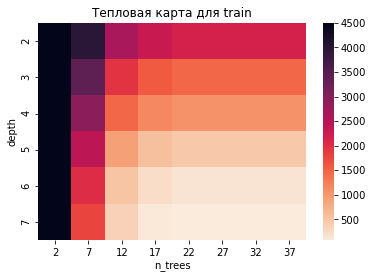

In [31]:
ax = sns.heatmap(results_train, cmap='rocket_r', vmax=4500).set_title('Тепловая карта для train')

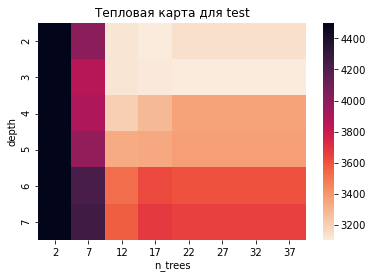

In [27]:
ax = sns.heatmap(results_test, cmap='rocket_r', vmax=4500).set_title('Тепловая карта для test')

Итого: как видно, после возрастания числа деревьев более 22 изменения метрики не происходит, поэтому больше их поднимать в данном случае нет необходимости. Также отчетливо заметно, что с ростом максимальной глубины дерева метрика на тесте уменьшается, а на обучающей выборке стремится к нулю, что говорит о переобучении модели.

**C текущим большим выбранным шагом обучения в 0.2 самой оптимальной моделью оказалась с числом деревьев в ансамбле равном 17 и максимальной глубине дерева 2-3 (результаты отличаются незначительно).**

----